In [1]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt

celltype = 'B'
with open(f'./{celltype}/{celltype}_tuning.json') as f:
    tuning = json.load(f)
    for k in tuning.keys():
        tuning[k] = np.array(tuning[k])

In [2]:
tuning.keys()

dict_keys(['Percentage', 'Prevalence', 'Train_prevalence', 'Feature_number', 'AUC', 'AUPR', 'MCC', 'Precision', 'F1 score', 'loss_history', 'error_history', 'log_lambda_range'])

In [3]:
tuning['Prevalence']

array([0.11847826, 0.12572464, 0.13297101, 0.14166667, 0.15144928,
       0.16195652, 0.17463768, 0.89057971, 0.89057971, 0.89492754,
       0.89927536, 0.93224638, 0.93224638, 0.93224638, 0.99710145,
       0.99855072, 0.99855072, 0.99710145, 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [4]:
# Find the index of prevalence that start to become 0 or fluctuate between 0 and 1
for i in range(len(tuning['Prevalence'])):
    if tuning['Prevalence'][i] == 0:
        next_value = tuning['Prevalence'][i+1]
        if next_value == 0 or next_value == 1:
            idx = i
            print(idx)
            break

20


In [5]:
trimmed_tuning = {}
for k in tuning.keys():
    trimmed_tuning[k] = tuning[k][:idx]

In [7]:
# lambda decision (from tuning result)
import os
import sys
# sys.path.append('/Users/evanli/Documents/EvanPys/Progress')
# sys.path.append('/home/jovyan/work/GitHub/EvanPys/Progress')
sys.path.append(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress")
# from ADlasso2 import AD2_w_utils_tuning as ad
from ADlasso2 import AD2_w_utils_lossdiff as ad


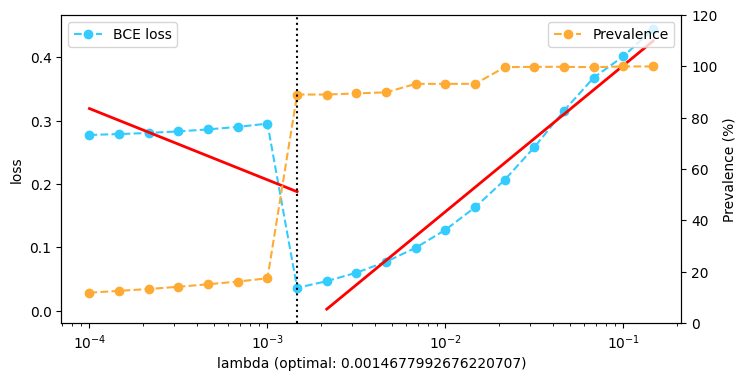

In [8]:
opt_lmbd, fig = ad.lambda_decision(trimmed_tuning, k=2)

In [13]:
np.exp(tuning['log_lambda_range'])[12]

0.010000000000000004

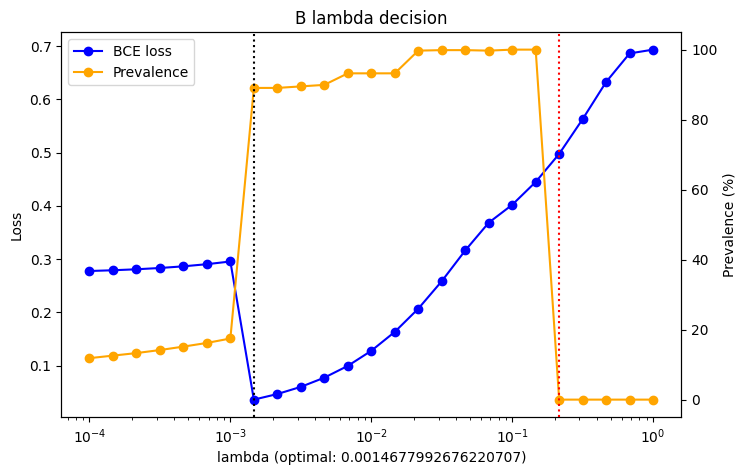

In [9]:
# Plot lambda vs. prevalence and lambda vs. loss
# also mark the optimal lambda and the lambda that prevalence start to become 0
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize = (8, 5))
ax2 = ax1.twinx()

line1, = ax1.plot(np.exp(tuning['log_lambda_range']), tuning['loss_history'], marker='o', color='blue')
line2, = ax2.plot(np.exp(tuning['log_lambda_range']), 100*tuning['Prevalence'], marker='o', color='orange')
ax1.set(xscale="log")
plt.axvline(x=opt_lmbd, color = 'black', linestyle=':')
plt.axvline(x=np.exp(tuning['log_lambda_range'][idx]), color = 'red', linestyle=':')
ax1.set_xlabel(f"lambda (optimal: {opt_lmbd})")
ax1.set_ylabel("Loss"); ax2.set_ylabel("Prevalence (%)")
# ax2.set_ylim(0, 120)
ax1.set_title(f'{celltype} lambda decision')
# ax1.legend(['BCE loss'], loc='upper left')
# ax2.legend(['Prevalence'], loc='upper left')
plt.legend(handles=[line1, line2], labels=['BCE loss', 'Prevalence'], loc='upper left')

## Trim tuning results for all celltypes

In [10]:
# Plot lambda vs. prevalence and lambda vs. loss
# also mark the optimal lambda and the lambda that prevalence start to become 0

def plot_lambda_decision(tuning, celltype, opt_lmbd, cut_idx, savepath=''):
    # print('=====================')
    # print(celltype)
    # with open(f'./{celltype}/{celltype}_tuning.json') as f:
    #     tuning = json.load(f)
    #     for k in tuning.keys():
    #         tuning[k] = np.array(tuning[k])
            
    fig, ax1 = plt.subplots(figsize = (8, 5))
    ax2 = ax1.twinx()

    line1, = ax1.plot(np.exp(tuning['log_lambda_range']), tuning['loss_history'], marker='o', color='blue')
    line2, = ax2.plot(np.exp(tuning['log_lambda_range']), 100*tuning['Prevalence'], marker='o', color='orange')
    ax1.set(xscale="log")
    plt.axvline(x=opt_lmbd, color = 'black', linestyle=':')
    print('Cut:', np.exp(tuning['log_lambda_range'][cut_idx]))
    plt.axvline(x=np.exp(tuning['log_lambda_range'][cut_idx]), color = 'red', linestyle=':')
    ax1.set_xlabel(f"lambda (optimal: {opt_lmbd})")
    ax1.set_ylabel("Loss"); ax2.set_ylabel("Prevalence (%)")
    # ax2.set_ylim(0, 120)
    ax1.set_title(f'{celltype} lambda decision')
    plt.legend(handles=[line1, line2], labels=['BCE loss', 'Prevalence'], loc='upper left')

    if savepath:
        plt.savefig(savepath, dpi=300)

B
20
Feature no: 17
Cut: 0.21544346900318853
CD4_T
21
Feature no: 1794
Cut: 0.31622776601683833
CD8_T
20
Feature no: 24
Cut: 0.21544346900318853
DC
14
Feature no: 18
Cut: 0.02154434690031885
Mono
22
Feature no: 17
Cut: 0.46415888336127825
NK
19
Feature no: 28
Cut: 0.146779926762207
other
15
Feature no: 4
Cut: 0.031622776601683826
other_T
15
Feature no: 76
Cut: 0.031622776601683826


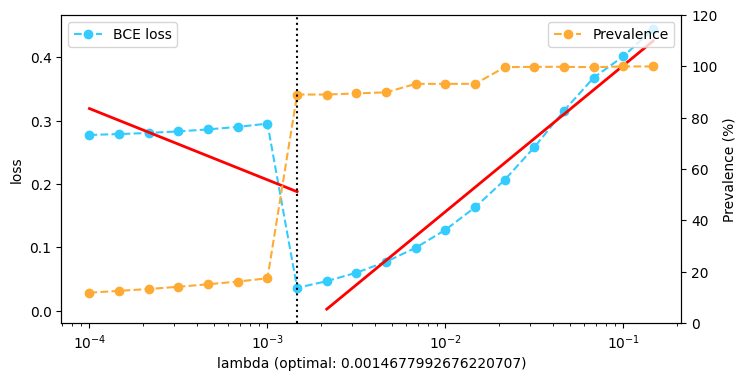

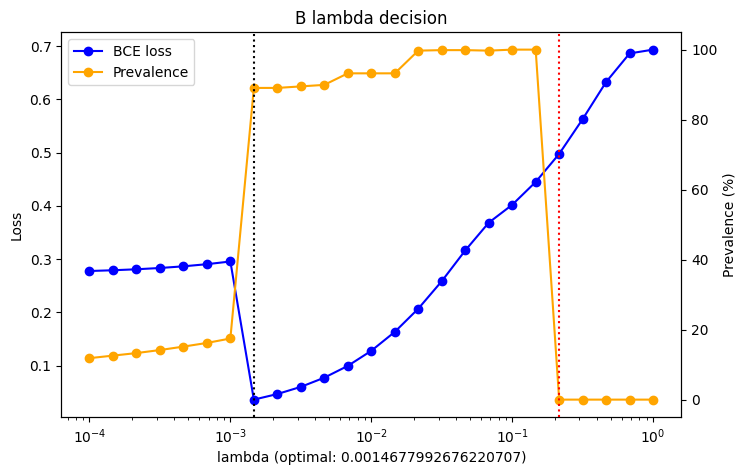

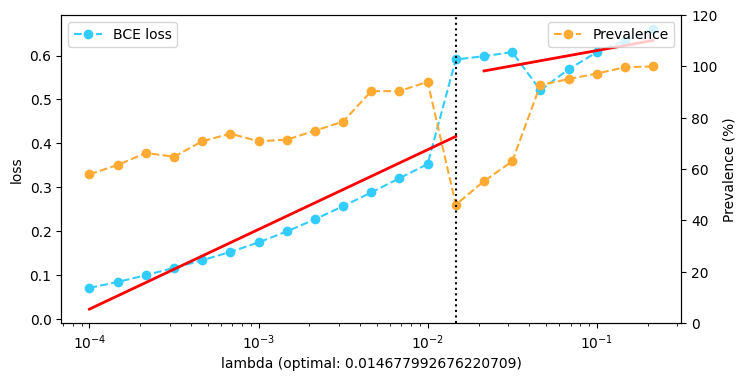

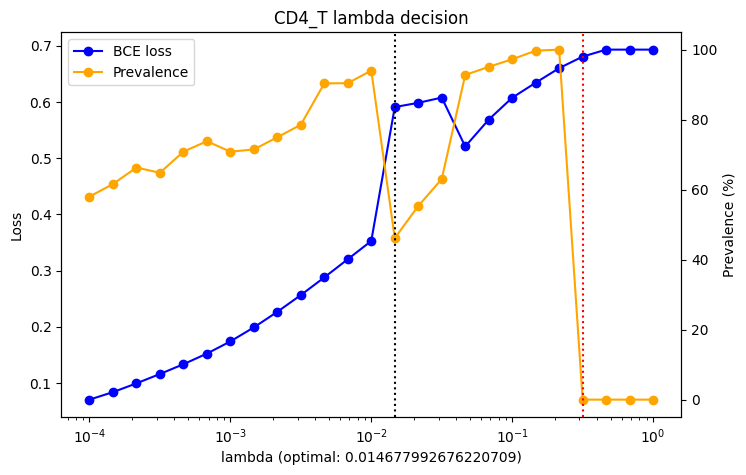

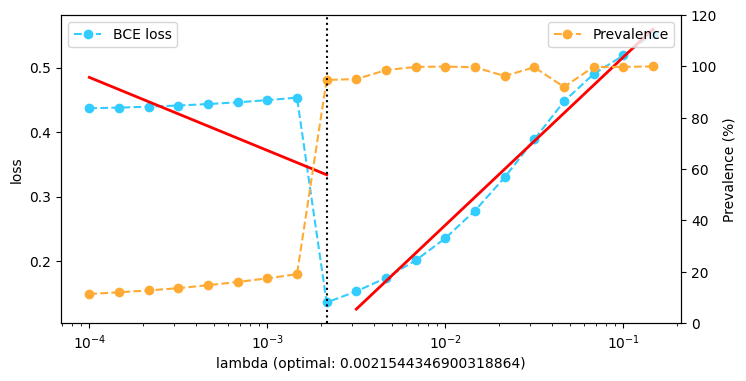

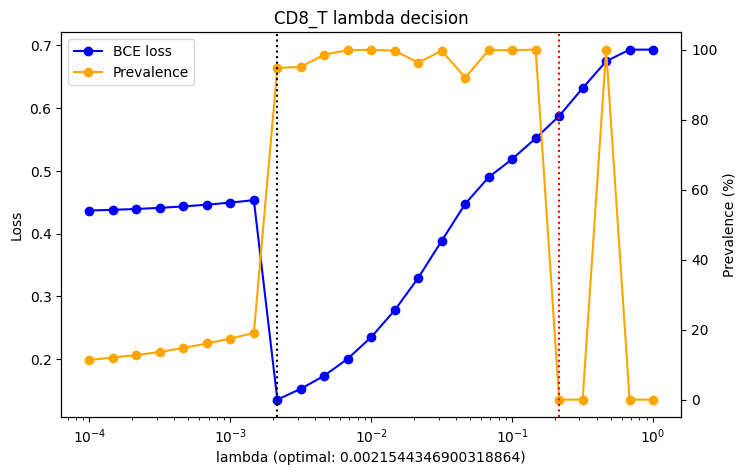

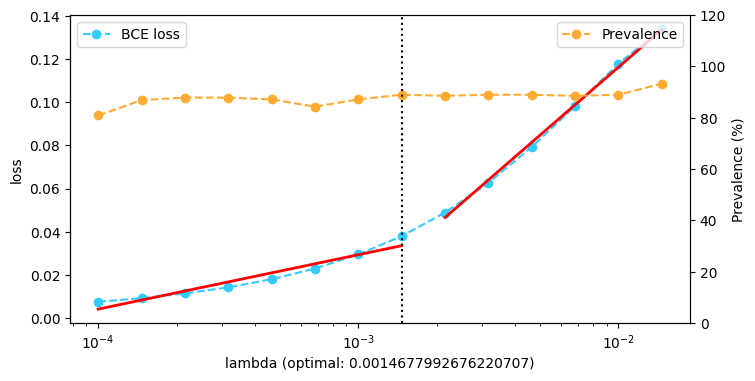

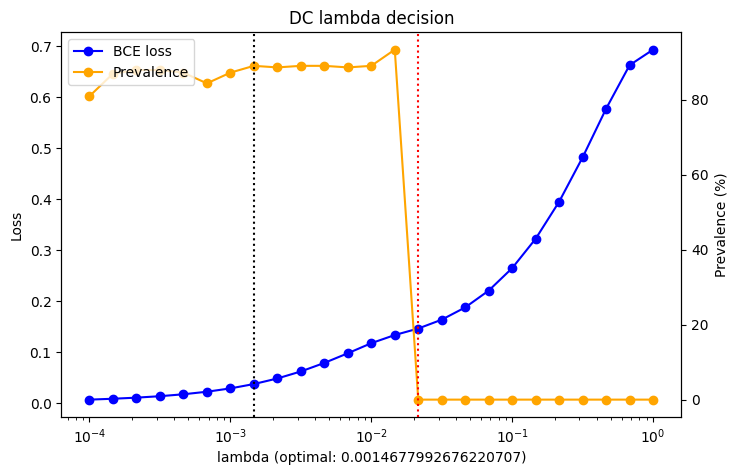

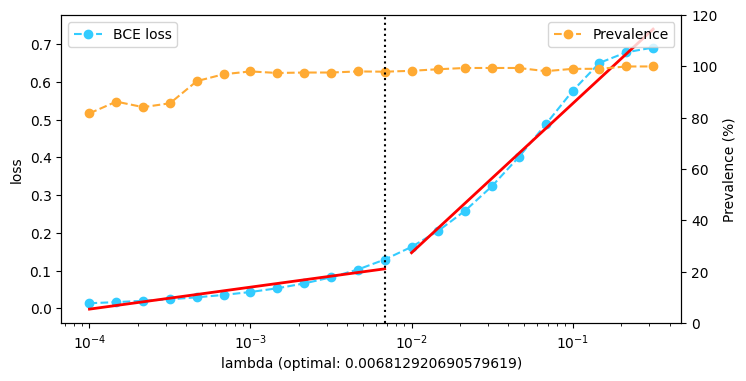

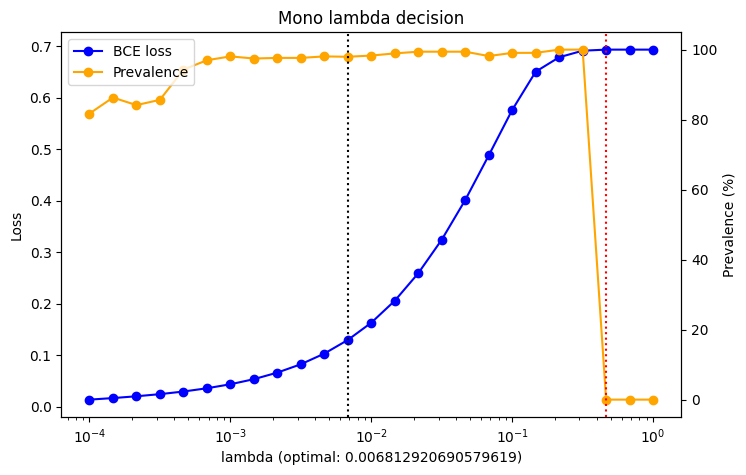

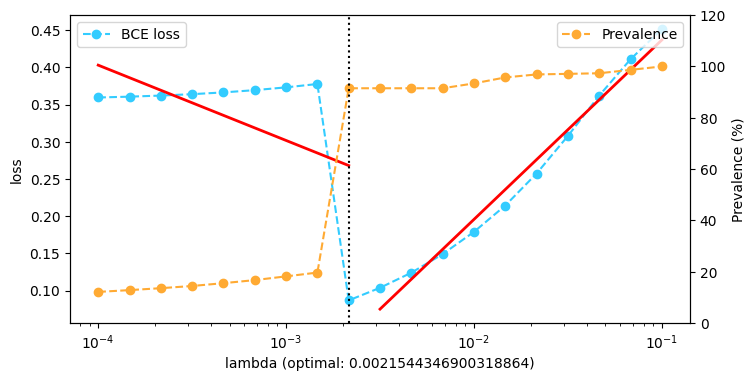

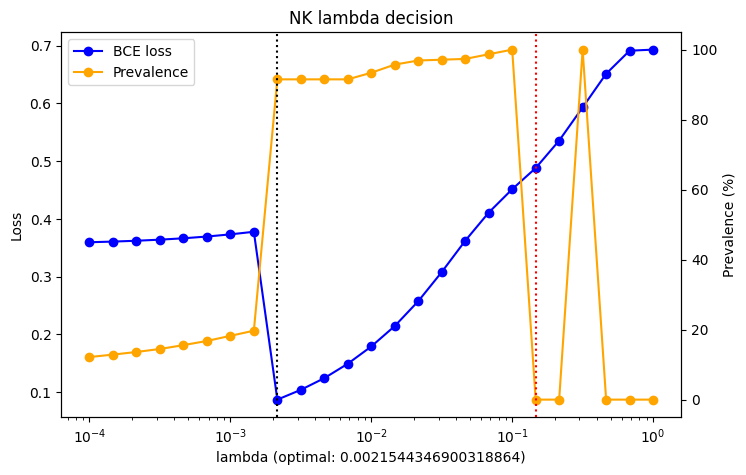

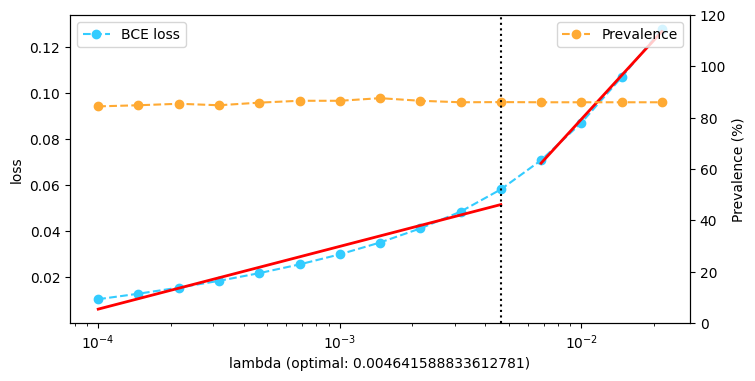

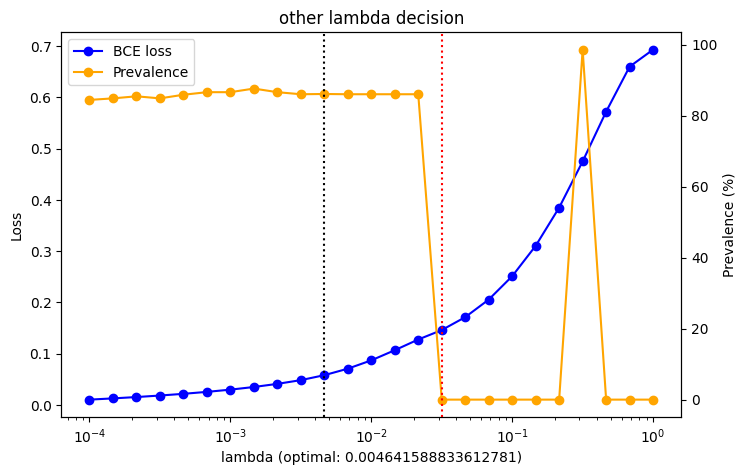

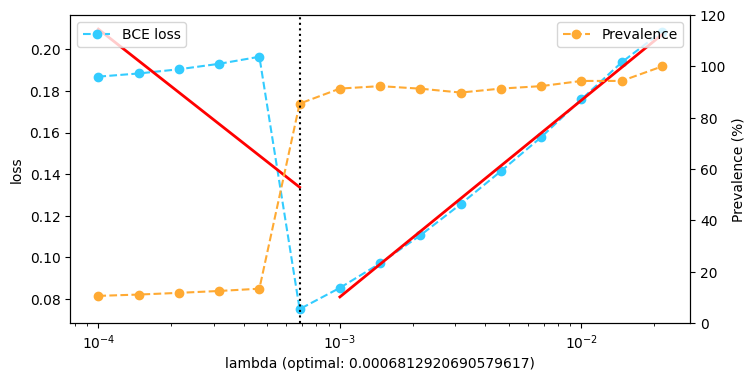

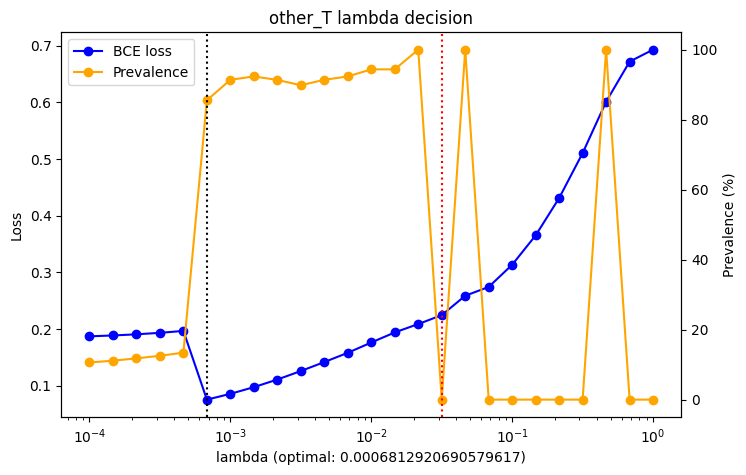

In [11]:
# Plot lambda decision (only trimmed tuning segment)
types = ['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']
opt_lmbd_dict = {}

for celltype in types:
    print('=====================')
    print(celltype)
    with open(f'./{celltype}/{celltype}_tuning.json') as f:
        tuning = json.load(f)
        for k in tuning.keys():
            tuning[k] = np.array(tuning[k])
    
    # Find the index of prevalence that start to become 0 or fluctuate between 0 and 1
    for i in range(len(tuning['Prevalence'])):
        if tuning['Prevalence'][i] == 0:
            next_value = tuning['Prevalence'][i+1]
            if next_value == 0 or next_value == 1:
                cut_idx = i
                print(cut_idx)
                break
    
    trimmed_tuning = {}
    for k in tuning.keys():
        trimmed_tuning[k] = tuning[k][:cut_idx]
    
    # Lambda decision from trimmed tuning result
    opt_lmbd, fig = ad.lambda_decision(trimmed_tuning, k=2)
    opt_lmbd_dict[celltype] = opt_lmbd
    # print(opt_lmbd)

    # Count feature number
    log_opt_lmbd = np.log(opt_lmbd)

    log_lambda_range = tuning['log_lambda_range']
    opt_idx = np.where(log_lambda_range == log_opt_lmbd)[0][0]

    feature_no_celltype = int(tuning['Feature_number'][opt_idx])
    print('Feature no:', feature_no_celltype)

    # Plot lambda vs. prevalence and lambda vs. loss
    # plot_lambda_decision(tuning, celltype, opt_lmbd, cut_idx, savepath=f'./{celltype}_lambda_decision_all.png')
    plot_lambda_decision(tuning, celltype, opt_lmbd, cut_idx)

In [21]:
opt_lmbd_dict

{'B': 0.0014677992676220707,
 'CD4_T': 0.014677992676220709,
 'CD8_T': 0.0021544346900318864,
 'DC': 0.0014677992676220707,
 'Mono': 0.006812920690579619,
 'NK': 0.0021544346900318864,
 'other': 0.004641588833612781,
 'other_T': 0.0006812920690579617}

In [18]:
with open('v3_lambda_decision_new.json', 'w') as f:
    json.dump(opt_lmbd_dict, f)

## Number of features selected under new optimal lambda

In [15]:
# Plot all tuning results
types = ['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']
feature_no = {}

for celltype in types:
    print('=====================')
    print(celltype)
    with open(f'./{celltype}/{celltype}_tuning.json') as f:
        tuning = json.load(f)
        for k in tuning.keys():
            tuning[k] = np.array(tuning[k])
    
    opt_lmbd = opt_lmbd_dict[celltype]

    # Count feature number
    log_opt_lmbd = np.log(opt_lmbd)

    log_lambda_range = tuning['log_lambda_range']
    opt_idx = np.where(log_lambda_range == log_opt_lmbd)[0][0]

    feature_no_celltype = int(tuning['Feature_number'][opt_idx])
    feature_no[celltype] = feature_no_celltype
    # print('Feature no:', feature_no_celltype)
    

B
CD4_T
CD8_T
DC
Mono
NK
other
other_T


In [16]:
feature_no

{'B': 17,
 'CD4_T': 1794,
 'CD8_T': 24,
 'DC': 18,
 'Mono': 17,
 'NK': 28,
 'other': 4,
 'other_T': 76}

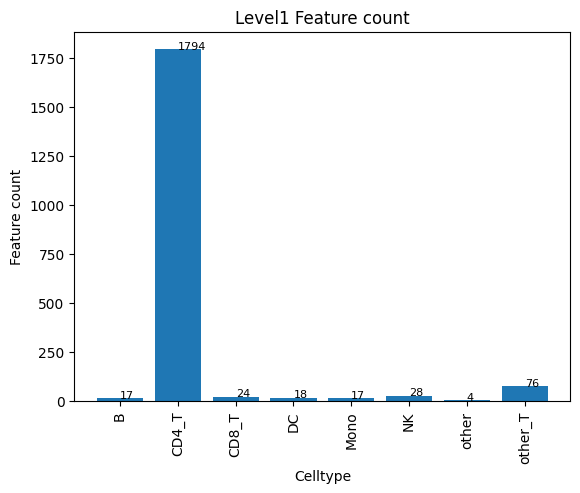

In [17]:
# plt.bar(feature_no_df['Celltype'], feature_no_df['Features'])
plt.bar(feature_no.keys(), feature_no.values())

# Add the values to each bar
for i, v in feature_no.items():
    plt.text(i, v, str(v), fontsize=8)

# Set the x-axis label
plt.xlabel('Celltype')
plt.xticks(rotation=90)

# Set the y-axis label
plt.ylabel('Feature count')

# Set y-axis to log scale
# plt.yscale('log')

plt.title('Level1 Feature count')
# Show the plot
plt.show()

## Hypothesize: CD4_T optimal lambda is at 0.01 instead of 0.01468

In [18]:
cd4 = 0.010000000000000004
# Count feature number
log_cd4 = np.log(opt_lmbd)

log_lambda_range = tuning['log_lambda_range']
opt_idx = np.where(log_lambda_range == log_opt_lmbd)[0][0]

feature_no_cd4 = int(tuning['Feature_number'][opt_idx])
feature_no_cd4

76

In [19]:
new_dict = feature_no.copy()
new_dict['CD4_T'] = feature_no_cd4
new_dict

{'B': 17,
 'CD4_T': 76,
 'CD8_T': 24,
 'DC': 18,
 'Mono': 17,
 'NK': 28,
 'other': 4,
 'other_T': 76}

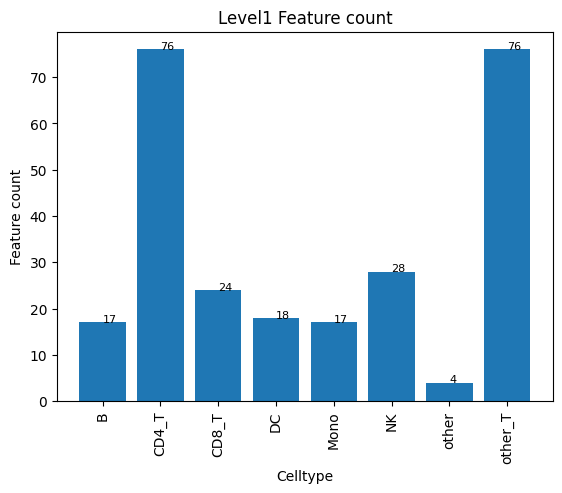

In [20]:
# plt.bar(feature_no_df['Celltype'], feature_no_df['Features'])
plt.bar(new_dict.keys(), new_dict.values())

# Add the values to each bar
for i, v in new_dict.items():
    plt.text(i, v, str(v), fontsize=8)

# Set the x-axis label
plt.xlabel('Celltype')
plt.xticks(rotation=90)

# Set the y-axis label
plt.ylabel('Feature count')

# Set y-axis to log scale
# plt.yscale('log')

plt.title('Level1 Feature count')
# Show the plot
plt.show()

In [22]:
opt_lmbd_dict_cd4 = opt_lmbd_dict.copy()
opt_lmbd_dict_cd4['CD4_T'] = cd4
opt_lmbd_dict_cd4

{'B': 0.0014677992676220707,
 'CD4_T': 0.010000000000000004,
 'CD8_T': 0.0021544346900318864,
 'DC': 0.0014677992676220707,
 'Mono': 0.006812920690579619,
 'NK': 0.0021544346900318864,
 'other': 0.004641588833612781,
 'other_T': 0.0006812920690579617}

In [24]:
with open('v3_lambda_decision_new_cd4.json', 'w') as f:
    json.dump(opt_lmbd_dict_cd4, f)